In [32]:
import pandas as pd
from perceptron import Perceptron

In [39]:
# 定义激活函数f
def active_function(x):
    # return x
    if x < 0.5:
        return 0
    elif x > 0.5 and x < 2:
        return 1
    elif x > 2:
        return 2

class LinearUnit(Perceptron):
    def __init__(self, input_num):
        '''初始化线性单元，设置输入参数的个数'''
        Perceptron.__init__(self, input_num, activator=active_function)

In [40]:
# 读取 Iris 数据集并构建模型训练所需的输入数据和标签
def get_training_dataset():
    data = pd.read_csv('data/iris/iris.data', header=None)
    # 将数据集的前四列作为输入特征 x，将第五列（索引为 4）进行分类编码得到标签 y
    # y:0 (stands for Iris-setosa), 1 (stands for Iris-versicolor), and 2 (stands for Iris-virginica)
    x, y = data[[0, 1, 2, 3]], pd.Categorical(data[4]).codes
    # pd.to_list pd.Categorical(data[4]).codes 的返回值是一个 NumPy 数组
    # .codes 属性返回了这个分类数据对应的整数编码，其已经是整数编码的类别标签，不需要再转换为列表。
    
    input_vecs = x.values.tolist()
    labels = y.tolist()
    # print(input_vecs)
    # print(type(labels), labels)
    # 返回输入向量列表和标签列表作为训练数据 
    return input_vecs, labels

In [41]:
def train_linear_unit():
    '''
    使用数据训练线性单元
    '''
    # 创建感知器，输入参数的特征数为4
    lu = LinearUnit(4)
    # 训练，迭代10000轮, 学习速率为0.001
    input_vecs, labels = get_training_dataset()
    lu.train(input_vecs, labels, 10000, 0.001)
    # 返回训练好的线性单元
    return lu


def plot(linear_unit):
    import matplotlib.pyplot as plt
    input_vecs, labels = get_training_dataset()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(list(map(lambda x: x[0], input_vecs)), labels)
    
    weights = linear_unit.weights
    bias = linear_unit.bias
    x = range(0,12,1)
    y = list(map(lambda x:weights[0] * x + bias, x))
    ax.plot(x, y)
    
    plt.show()

predict
0
2
2
1


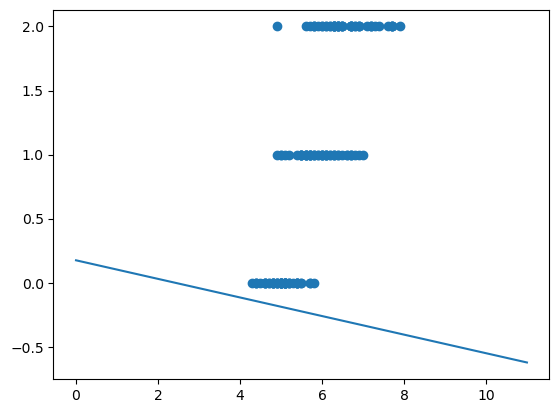

In [42]:
if __name__ == '__main__':
    '''训练线性单元'''
    linear_unit = train_linear_unit()
    print("predict")
    print(linear_unit.predict([5.1, 3.5, 1.4, 0.2]))
    print(linear_unit.predict([5.9, 3.0, 5.1, 1.8]))
    print(linear_unit.predict([6.0,2.2,5.0,1.5]))
    print(linear_unit.predict([6.0, 3.4, 4.5, 1.6]))
    plot(linear_unit)

    # 打印训练获得的权重